# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

### 1.2 Collect Images Using OpenCV

In [6]:
import os
import time
import uuid
#uuid is used to give unique names to image files
import cv2

In [7]:
#create a folder called data in the location of ipynb file and another folder called images in data folder
IMAGES_PATH = os.path.join('data','images')
IMAGES_PATH

'data\\images'

## Below are two methods to upload images (Please use any one as per need and avoid running cells for both methods)

#### Method one (Capture images through your webcam)

In [12]:
# capture around 70 images to have a decent dataset size
number_images = 70

# experiment changing VideoCapture argument to 1 or 0 to enable web cam access based on laptop
cap = cv2.VideoCapture(0)

#the code below runs a loop for number_images and stores each image with uuid in IMAGES_PATH
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)

# You can change time.sleep argument to increase or decrease the time gap between image captures
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [16]:
#If you get the following error then change cap = cv2.VideoCapture(1) to cap = cv2.VideoCapture(0)
#error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:786: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

In [18]:
# Its important to note that all images in this method have the same dimensions

#### Method two (If images are already saved in data\\images )

In [13]:
#print all files existing in the images folder 
filename = os.listdir(IMAGES_PATH)
filename

['000560.jpg',
 '000561.jpg',
 '000562.jpg',
 '000563.jpg',
 '000564.jpg',
 '000565.jpg',
 '000566.jpg',
 '000567.jpg',
 '000568.jpg',
 '000569.jpg',
 '000570.jpg',
 '000571.jpg',
 '000572.jpg',
 '000573.jpg',
 '000574.jpg',
 '000575.jpg',
 '000576.jpg',
 '000577.jpg',
 '000578.jpg',
 '000579.jpg',
 '000580.jpg',
 '000581.jpg',
 '000582.jpg',
 '000583.jpg',
 '000584.jpg',
 '000585.jpg',
 '000586.jpg',
 '000587.jpg',
 '000588.jpg',
 '000589.jpg',
 '000590.jpg',
 '000591.jpg',
 '000592.jpg',
 '000593.jpg',
 '000594.jpg',
 '000595.jpg',
 '000596.jpg',
 '000597.jpg',
 '000598.jpg',
 '000599.jpg',
 '000600.jpg',
 '000601.jpg',
 '000602.jpg',
 '000603.jpg',
 '000604.jpg',
 '000605.jpg',
 '000606.jpg',
 '000607.jpg',
 '000608.jpg',
 '000609.jpg',
 '000610.jpg',
 '000611.jpg',
 '000612.jpg',
 '000613.jpg',
 '000614.jpg',
 '000639.jpg',
 '000641.jpg',
 '000642.jpg',
 '000643.jpg',
 '000652.jpg',
 '000664.jpg',
 '000670.jpg',
 '000677.jpg',
 '000683.jpg',
 '000692.jpg',
 '000726.jpg',
 '000750.j

In [15]:
#rename all the files using uuid for uniformity

for imgnum in filename:
    
#give the complete file path for one image in the folder to extract path
    file_path = 'C:/Users/Ramita/our face detection model/FaceDetection/data/images/000781.jpg'
    
# Extract the directory and the current filename
    directory, old_name = os.path.split(file_path)
    old_name = imgnum
    new_name=f'{str(uuid.uuid1())}.jpg'
    old_path=directory+f'/'+old_name

# Create the new file path
    new_path=directory+f'/'+new_name

# Rename the file
    os.rename(old_path, new_path)
    print(f"Renamed: {old_name} to {new_name}")

Renamed: 000560.jpg to 46795a4d-b4f6-11ee-aba8-c89402f85030.jpg
Renamed: 000561.jpg to 46798146-b4f6-11ee-a95a-c89402f85030.jpg
Renamed: 000562.jpg to 4679a7da-b4f6-11ee-9861-c89402f85030.jpg
Renamed: 000563.jpg to 4679a7db-b4f6-11ee-926e-c89402f85030.jpg
Renamed: 000564.jpg to 4679e2f4-b4f6-11ee-bfa9-c89402f85030.jpg
Renamed: 000565.jpg to 4679f6fe-b4f6-11ee-9f2f-c89402f85030.jpg
Renamed: 000566.jpg to 467a0ba1-b4f6-11ee-a37f-c89402f85030.jpg
Renamed: 000567.jpg to 467a0ba2-b4f6-11ee-91fd-c89402f85030.jpg
Renamed: 000568.jpg to 467a0ba3-b4f6-11ee-9115-c89402f85030.jpg
Renamed: 000569.jpg to 467a0ba4-b4f6-11ee-b0a8-c89402f85030.jpg
Renamed: 000570.jpg to 467a464f-b4f6-11ee-8f86-c89402f85030.jpg
Renamed: 000571.jpg to 467a6daf-b4f6-11ee-9914-c89402f85030.jpg
Renamed: 000572.jpg to 467a6db0-b4f6-11ee-bcdf-c89402f85030.jpg
Renamed: 000573.jpg to 467a6db1-b4f6-11ee-8a28-c89402f85030.jpg
Renamed: 000574.jpg to 467a6db2-b4f6-11ee-b70e-c89402f85030.jpg
Renamed: 000575.jpg to 467a6db3-b4f6-11e

In [19]:
# Its important to note that all images might not have same dimensions therefore we must use padding to make them uniform

In [20]:
from PIL import Image

# Set your input and output folders
input_folder_path = "C:/Users/Ramita/our face detection model/FaceDetection/data/images"
output_folder_path = "C:/Users/Ramita/our face detection model/FaceDetection/data/padded-images"


# Set the target size (width, height) for padding
target_size = (400, 600)

def pad_images(input_folder, output_folder, target_size):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through images in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        
        # Open the image
        img = Image.open(input_path)

        # Get the current dimensions
        width, height = img.size

        # Calculate padding
        pad_width = max(0, target_size[0] - width)
        pad_height = max(0, target_size[1] - height)

        # Calculate padding on both sides
        left_padding = pad_width // 2
        top_padding = pad_height // 2
        right_padding = pad_width - left_padding
        bottom_padding = pad_height - top_padding

        # Apply padding
        padded_img = Image.new(img.mode, target_size, (255, 255, 255))  # White padding
        padded_img.paste(img, (left_padding, top_padding))

        # Save the padded image to the output folder
        output_path = os.path.join(output_folder, filename)
        padded_img.save(output_path)



# Call the function to pad images
pad_images(input_folder_path, output_folder_path, target_size)


### 1.3 Annotate Images with LabelMe

In [44]:
#Here we are doing face detection. Just ignore images(don't label) images which dont have a face

In [22]:
#Create new folder called labels in data 
#Open dir for images or padded-images based on method used above and label images
#In File(upper left corner) enable save automatically and change output dir to data/labels
# Keyboard shortcut to move to next image in labelme: D

!labelme

2024-01-17 10:55:48,303 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Ramita\.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [23]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [24]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [25]:
tf.config.list_physical_devices('GPU')

[]

### 2.3 Load Image into TF Data Pipeline

In [26]:
#code below is used to create a dataset of file paths. It takes a file pattern as an argument and returns a dataset of file paths that match the specified pattern.
#use images or padded-images based on method used above

In [34]:
images = tf.data.Dataset.list_files('data\\padded-images\\*.jpg', shuffle=False)

In [35]:
#It's a way to iterate through the dataset and get individual elements as NumPy arrays
images.as_numpy_iterator().next()

b'data\\padded-images\\46795a4d-b4f6-11ee-aba8-c89402f85030.jpg'

In [36]:
#This function takes a single argument x, which is the file path to an image


def load_image(x): 
    byte_img = tf.io.read_file(x)
#line above returns a tensor representing the raw bytes of the file.
    img = tf.io.decode_jpeg(byte_img)
#line above decodes the JPEG-encoded image and returns a tensor representing the decoded image.
    return img

In [37]:
images = images.map(load_image)

#In summary, the code reads a set of image file paths from the images dataset 
#loads each image from the file, decodes it, 
#and creates a new dataset where each element is a tensor representing a decoded image

In [40]:
#map function applies load_image on each file of our dataset

In [38]:
images.as_numpy_iterator().next()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [39]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [41]:
#we will batch our images into sets of 4
image_generator = images.batch(4).as_numpy_iterator()

In [42]:
#code used to iterate through our batches
plot_images = image_generator.next()

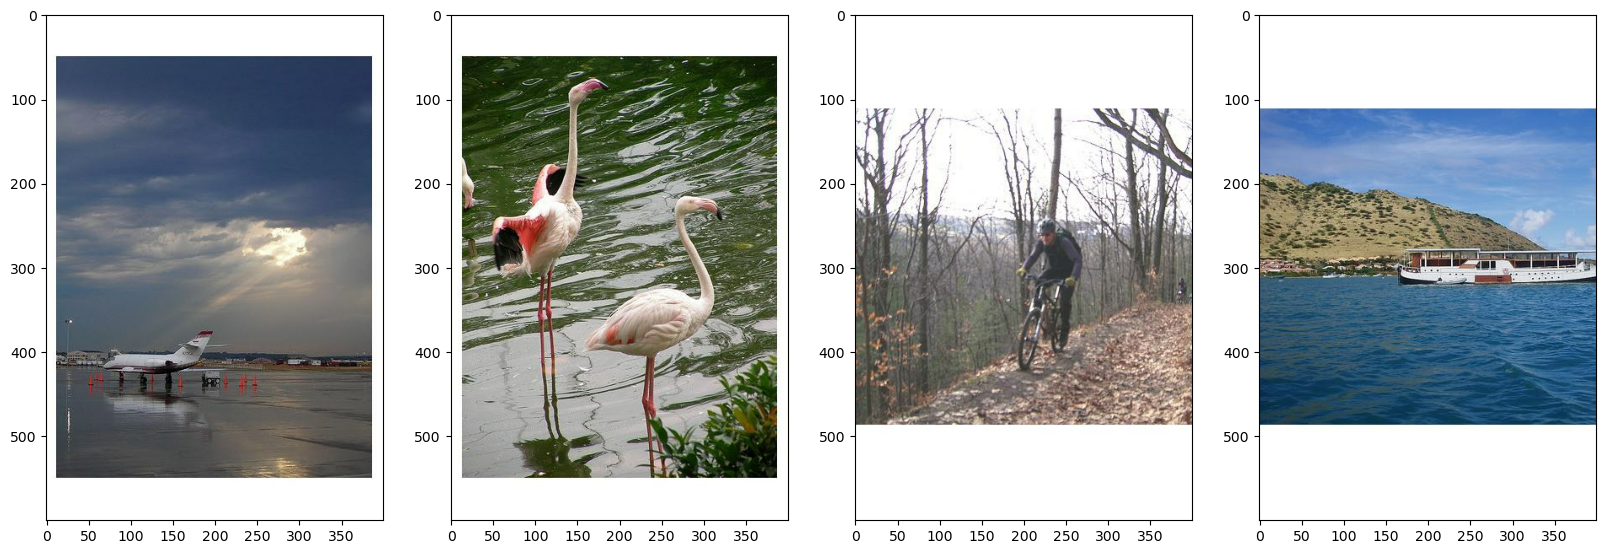

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [45]:
#Divide data into train, test and val split
#below code is just giving an estimate of how many images should go into train, how many in test and val
#here we have taken 70% of data as train and 30% as train and val

60*.7 # 42 to train



42.0

In [47]:
60*.15 # 9 and 9 to test and val

9.0

In [48]:
# Now create 3 new folders inside data folder called train, test and val
# Inside each of these 3 folders create 2 more folders called images and labels

In [51]:
# Manually move images into the images folders of train,test and val making sure that there is a mix of faces and non faces images.
# Based on above calculation we will move 42 images into train/images and 9 images into test/images and val/images


### 3.2 Move the Matching Labels

In [52]:
# we move labels from data/labels into train, test and val folder labels based on corresponding images in the folders

for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [53]:
# To increase the size of data set we use augmentation
import albumentations as alb

In [54]:
# Be careful while using randomCrop. Make sure the values(width=400, height=400) are leass than your image dimensions
augmentor = alb.Compose([alb.RandomCrop(width=400, height=400), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [55]:
# Test the augmentation on 1 image from train images

In [56]:
img = cv2.imread(os.path.join('data','train', 'images','467b8fbb-b4f6-11ee-afef-c89402f85030.jpg'))

In [57]:
with open(os.path.join('data', 'train', 'labels', '467b8fbb-b4f6-11ee-afef-c89402f85030.json'), 'r') as f:
    label = json.load(f)

In [58]:
# This code gives you coordinates of the bounding box for face in image 
label['shapes'][0]['points']

[[203.12500000000006, 110.41666666666667],
 [317.01388888888886, 304.1666666666667]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [59]:
# We transform coordinates of bounding box into a vector 
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [60]:
coords

[203.12500000000006, 110.41666666666667, 317.01388888888886, 304.1666666666667]

In [61]:
# We take our raw coordinates and divide by width and height of image to adjust bounding box
coords = list(np.divide(coords, [400,600,400,600]))

In [62]:
coords

[0.5078125000000001,
 0.1840277777777778,
 0.7925347222222221,
 0.5069444444444445]

### 4.4 Apply Augmentations and View Results

In [63]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [65]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [66]:
augmented['bboxes'][0][2:]

(0.4921874999999999, 0.7964583333333333)

In [67]:
# Coordinates of bounding box
augmented['bboxes']

[(0.2074652777777779,
  0.31208333333333316,
  0.4921874999999999,
  0.7964583333333333)]

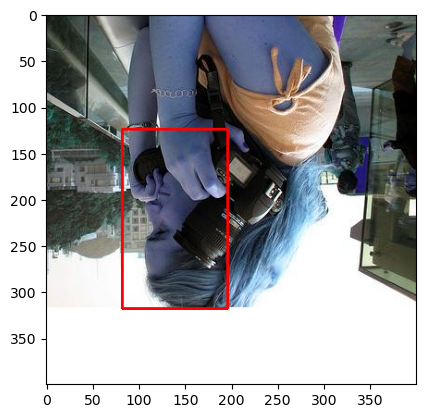

In [68]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [400,400]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [400,400]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [69]:
# In the location of this ipynb file create a folder called aug_data. 
# Inside aug_data create 3 folders called train, test and val 
# Inside all 3 folders (train, test and val) create 2 new folders called images and labels

In [70]:
# Iterate through train, test and val to get images 
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [400,600,400,600]))

        try: 
    # The code below will create 60 augmented images and their respective labels for each image
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.5911458333333333, 0.08449074074074076, 0.09982638888888885, 0.29513888888888884, 'face'].


### 5.2 Load Augmented Images to Tensorflow Dataset

In [ ]:
#

In [71]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)

# We resize the image to compress them inorder to create a more efficient neural network
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))

#we are scaling the image pixels to keep it between 0 and 1 so that later we can use a sigmoid activation function
train_images = train_images.map(lambda x: x/255)

In [72]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [73]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [74]:
train_images.as_numpy_iterator().next()

array([[[0.9954248 , 1.        , 0.98300654],
        [0.99019605, 0.9980392 , 0.99019605],
        [0.99607843, 1.        , 0.9810458 ],
        ...,
        [1.        , 1.        , 0.98562086],
        [0.99019605, 0.9980392 , 0.9862745 ],
        [0.9993463 , 1.        , 0.99869263]],

       [[0.9954248 , 1.        , 0.98300654],
        [0.99019605, 0.9980392 , 0.99019605],
        [0.99607843, 1.        , 0.9810458 ],
        ...,
        [1.        , 1.        , 0.98562086],
        [0.99019605, 0.9980392 , 0.9862745 ],
        [0.9993463 , 1.        , 0.99869263]],

       [[0.9954248 , 1.        , 0.98300654],
        [0.98856205, 0.9964052 , 0.98856205],
        [0.99553376, 1.        , 0.9805011 ],
        ...,
        [1.        , 1.        , 0.98562086],
        [0.99019605, 0.9980392 , 0.9862745 ],
        [0.9960784 , 0.9972768 , 0.9954247 ]],

       ...,

       [[0.99346405, 1.        , 0.9888889 ],
        [0.9941176 , 0.9980392 , 0.97843134],
        [0.99662316, 1

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [75]:
# We write a function to extract labels(coordinates of bbox and the class) from the labels folder 

def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [92]:
# Here we pass the path of each label to the load_labels function which returns coord of bbox and class(face or null) for each image
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [93]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [94]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [103]:
test_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

In [102]:
# View data for 120 elements in test_labels

iterator = test_labels.as_numpy_iterator()

for i in range(120):
    try:
        element = next(iterator)
        print(f"Element {i + 1}: {element}")
    except StopIteration:
        # Handle the case where the iterator reaches the end of the dataset
        break

Element 1: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 2: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 3: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 4: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 5: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 6: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 7: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 8: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 9: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 10: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 11: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 12: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))
Element 13: (array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float

Element 111: (array([1], dtype=uint8), array([0.6743, 0.2175, 0.9243, 0.438 ], dtype=float16))
Element 112: (array([1], dtype=uint8), array([0.6743, 0.6294, 0.9243, 0.85  ], dtype=float16))
Element 113: (array([1], dtype=uint8), array([0.6743, 0.262 , 0.9243, 0.4824], dtype=float16))
Element 114: (array([1], dtype=uint8), array([0.0755, 0.445 , 0.3254, 0.6655], dtype=float16))
Element 115: (array([1], dtype=uint8), array([0.6743, 0.2644, 0.9243, 0.485 ], dtype=float16))
Element 116: (array([1], dtype=uint8), array([0.6743, 0.135 , 0.9243, 0.3555], dtype=float16))
Element 117: (array([1], dtype=uint8), array([0.6743, 0.2996, 0.9243, 0.52  ], dtype=float16))
Element 118: (array([1], dtype=uint8), array([0.0755, 0.352 , 0.3254, 0.5723], dtype=float16))
Element 119: (array([1], dtype=uint8), array([0.6743, 0.302 , 0.9243, 0.5225], dtype=float16))
Element 120: (array([1], dtype=uint8), array([0.0755, 0.21  , 0.3254, 0.4304], dtype=float16))


# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [104]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2460, 2460, 540, 540, 540, 540)

In [ ]:
# The images and labels must be 

### 7.2 Create Final Datasets (Images/Labels)

In [105]:
train = tf.data.Dataset.zip((train_images, train_labels))

# The line below shuffles the dataset using a buffer. Use buffer larger than your data size e.g. 5000>2460
train = train.shuffle(5000)

# Split and create batches of 8
train = train.batch(8)

#This line prefetches batches of 4 elements to improve data loading performance during training
train = train.prefetch(4)

In [106]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [107]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [145]:
# We get 8 images and 8 annotations
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.6763, 0.2198, 0.834 , 0.343 ],
        [0.673 , 0.557 , 0.9644, 0.913 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.433 , 0.504 , 0.631 , 0.6377],
        [0.    , 0.    , 0.    , 0.    ],
        [0.4297, 0.8457, 0.5566, 0.941 ],
        [0.508 , 0.111 , 0.7925, 0.595 ]], dtype=float16))

### 7.3 View Images and Annotations

In [111]:
data_samples = train.as_numpy_iterator()

In [135]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


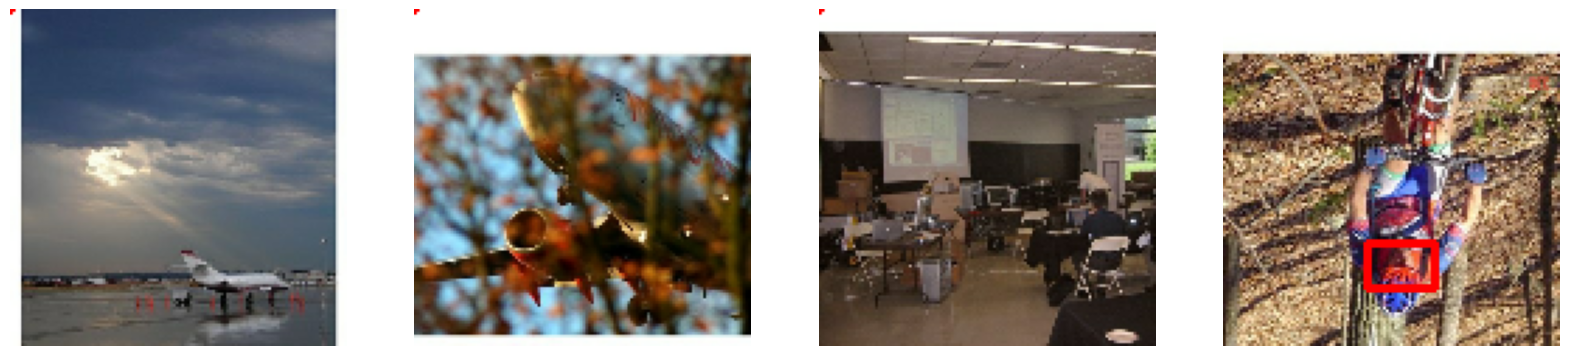

In [136]:


# Assuming res is your result, containing images and corresponding coordinates
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    # Ensure that the coordinates are a 1D array
    coords = np.array(sample_coords).flatten()

    # Determine the number of points
    num_points = len(coords) // 2

    # Reshape coordinates to (num_points, 2) array
    coords = coords.reshape((num_points, 2))

    # Convert coordinates to integer values for drawing
    bbox_start = tuple((coords.min(axis=0) * [120, 120]).astype(int))
    bbox_end = tuple((coords.max(axis=0) * [120, 120]).astype(int))

    # Convert sample_image to cv2.UMat
    sample_image_umat = cv2.UMat(sample_image)

    # Draw bounding box on the image
    cv2.rectangle(sample_image_umat, bbox_start, bbox_end, (255, 0, 0), 2)

    # Convert the result back to NumPy array
    sample_image_with_bbox = sample_image_umat.get()

    # Display the image with the bounding box
    ax[idx].imshow(sample_image_with_bbox)
    ax[idx].axis('off')  # Turn off axis labels for better visualization

plt.show()


# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [146]:
# Here we import deep learning models

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [147]:
# Instantiate VGG16 model without the fully-connected layers at the top because we will put our own regression model there
vgg = VGG16(include_top=False)

In [148]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [149]:
# Now we use 2 models in this case. VGG for classification and regression for detection(determine bounding box)

### 8.3 Build instance of Network

In [150]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.673 , 0.772 , 0.9644, 1.    ],
        [0.511 , 0.4563, 0.626 , 0.583 ],
        [0.702 , 0.3403, 0.796 , 0.4636],
        [0.511 , 0.0995, 0.626 , 0.2262],
        [0.    , 0.    , 0.    , 0.    ],
        [0.702 , 0.4802, 0.796 , 0.6035]], dtype=float16))

In [151]:
# Above we observe that we first have a class list and later a list of bounding box coordinates.
# For our model we will do the exact same breakdown


In [152]:
def build_model(): 
    
# We define our input dimensions 
    input_layer = Input(shape=(120,120,3))
    
# We pass the input to VGG
    vgg = VGG16(include_top=False)(input_layer)
    
# We are going to define 2 models below. One for classification and another fir regression

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
# class2 has 1 output(face or null) which is between 0 and 1 because of sigmoid activation function
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
# regress2 has 4 outputs(bounding box coordinates) between 0 and 1 because of sigmoid activation function
    regress2 = Dense(4, activation='sigmoid')(regress1)

# We create our final model combining class 2 from classification and regress2 from regression
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [153]:
#Here we build our model
facetracker = build_model()

In [154]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [155]:
X, y = train.as_numpy_iterator().next()

In [156]:
X.shape

(8, 120, 120, 3)

In [157]:
# Output of our model is class and coordinates of bounding box
# Here we pass images in a batch to our model for prediction
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 957ms/step


In [158]:
classes, coords

(array([[0.5130099 ],
        [0.41446564],
        [0.5515583 ],
        [0.54154766],
        [0.4946631 ],
        [0.45116556],
        [0.48466152],
        [0.54714036]], dtype=float32),
 array([[0.6958954 , 0.47504222, 0.43288326, 0.6941452 ],
        [0.6443561 , 0.4054663 , 0.41904134, 0.5813415 ],
        [0.6474728 , 0.5244582 , 0.40202823, 0.68450475],
        [0.748083  , 0.51234156, 0.3633901 , 0.7147454 ],
        [0.6554129 , 0.5243826 , 0.3973111 , 0.7600396 ],
        [0.6634653 , 0.44431588, 0.4690283 , 0.5927484 ],
        [0.6175044 , 0.45603356, 0.50564265, 0.643222  ],
        [0.68157816, 0.59229356, 0.4196121 , 0.68190455]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [159]:
# We decrease our learning rate so that the model doesn't over fit after each epoch

In [160]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [163]:

# Initial learning rate
initial_learning_rate = 0.0001

# Define a learning rate schedule using ExponentialDecay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,  # Initial learning rate
    decay_steps=10000,       # Number of steps after which to apply decay
    decay_rate=0.9,          # Decay rate (new_learning_rate = old_learning_rate * decay_rate)
    staircase=True           # If True, decay the learning rate at discrete intervals
)

# Create an instance of the Adam optimizer with the learning rate schedule
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


### 9.2 Create Localization Loss and Classification Loss

In [164]:
def localization_loss(y_true, yhat):
    # Compute the squared difference in coordinates (x, y) between true and predicted bounding boxes
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))

    # Calculate the actual height and width of the true bounding box
    h_true = y_true[:, 3] - y_true[:, 1]  # Actual height of the bounding box
    w_true = y_true[:, 2] - y_true[:, 0]  # Actual width of the bounding box

    # Calculate the predicted height and width of the bounding box
    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]

    # Compute the squared difference in size (height and width) between true and predicted bounding boxes
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    # Return the sum of coordinate and size differences as the localization loss
    return delta_coord + delta_size


In [166]:
#Define our classification and regression losses
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [167]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.1599207>

In [168]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.648476>

In [169]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.1599207>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [170]:
# Whenever you subclass the Model class from keras it must contain:
# an init method, compile method, train step method and a call method

class FaceTracker(Model):
# Compile through our initial parameters
    def __init__(self, facetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = facetracker

# Pass the loss and optimizer in compile method
    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
#take in 1 batch of data and start training on it     
        X, y = batch
        
        with tf.GradientTape() as tape: 
            # We pass images from batch to model for training
            classes, coords = self.model(X, training=True)
            
            # Send classes to classification loss and coords to localization loss functions
            batch_classloss = self.closs(y[0], classes)
            # Above we send (y-true,y-pred)
            
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            # We calculate total loss
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            #calculate gradients wrt loss function
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    # Test step is triggered whenever we pass val data
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [171]:
model = FaceTracker(facetracker)

In [172]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [173]:
logdir='logs'

In [174]:
# Used to review model performance
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Next we train the model using the fit method

In [175]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
308/308 [==============================] - 327s 1s/step - total_loss: 0.9393 - class_loss: 0.3620 - regress_loss: 0.7583 - val_total_loss: 0.1740 - val_class_loss: 0.0194 - val_regress_loss: 0.1643
Epoch 2/10
308/308 [==============================] - 312s 1s/step - total_loss: 0.1787 - class_loss: 0.0464 - regress_loss: 0.1555 - val_total_loss: 1.3178 - val_class_loss: 1.5047 - val_regress_loss: 0.5654
Epoch 3/10
308/308 [==============================] - 319s 1s/step - total_loss: 0.0239 - class_loss: 0.0011 - regress_loss: 0.0234 - val_total_loss: 0.8505 - val_class_loss: 0.9927 - val_regress_loss: 0.3541
Epoch 4/10
308/308 [==============================] - 274s 873ms/step - total_loss: 0.0114 - class_loss: 2.2909e-04 - regress_loss: 0.0113 - val_total_loss: 0.9225 - val_class_loss: 0.5683 - val_regress_loss: 0.6383
Epoch 5/10
308/308 [==============================] - 265s 852ms/step - total_loss: 0.0078 - class_loss: 1.1631e-04 - regress_loss: 0.0077 - val_total_loss: 

### 10.3 Plot Performance

In [176]:
# Use command to get loss history of model
hist.history

{'total_loss': [0.022379070520401,
  0.028461067005991936,
  0.011488834396004677,
  0.0008057564846239984,
  0.00747494213283062,
  0.0038668038323521614,
  0.002352748066186905,
  0.005554587114602327,
  0.001855284906923771,
  0.00019657364464364946],
 'class_loss': [0.011219466105103493,
  0.00042368299909867346,
  2.682209867543861e-07,
  4.020654523628764e-05,
  1.5795641957083717e-05,
  1.199560210807249e-05,
  1.6391282997574308e-07,
  2.384186927884002e-07,
  3.212896626791917e-05,
  0.0],
 'regress_loss': [0.01676933839917183,
  0.0282492246478796,
  0.011488700285553932,
  0.0007856531883589923,
  0.0074670445173978806,
  0.0038608061149716377,
  0.0023526661098003387,
  0.0055544679053127766,
  0.0018392204074189067,
  0.00019657364464364946],
 'val_total_loss': [0.17402926087379456,
  1.317764401435852,
  0.8504587411880493,
  0.9224528074264526,
  0.13986508548259735,
  0.8087501525878906,
  0.20686446130275726,
  0.9610756635665894,
  0.7178061008453369,
  0.354161858558

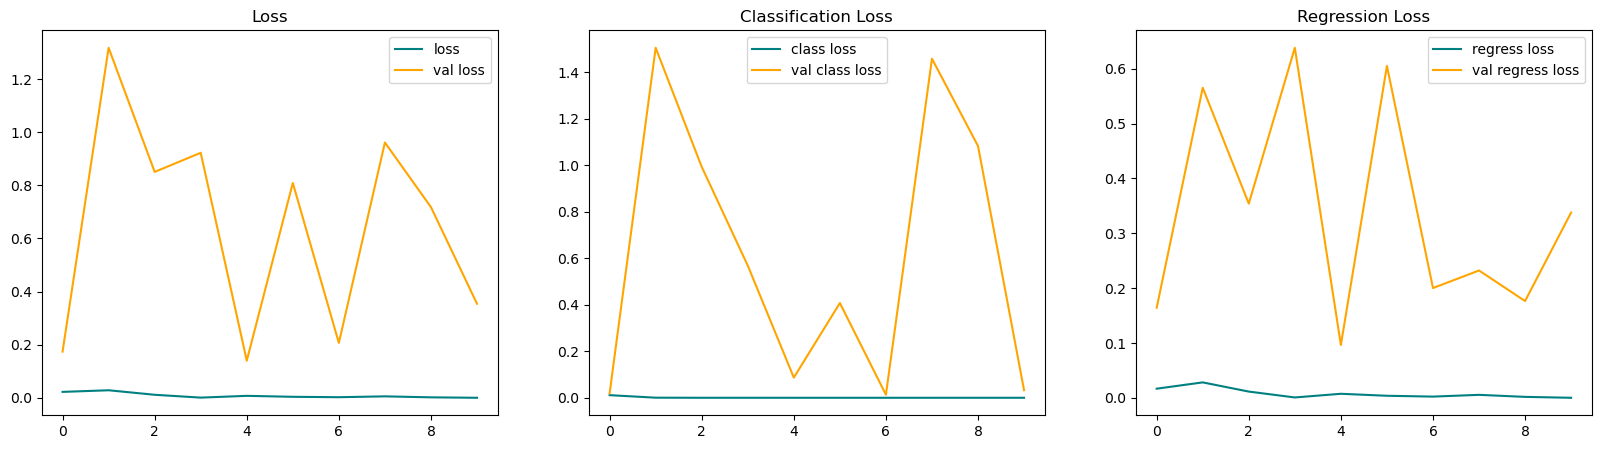

In [177]:
# Code to plot all the losses 

fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [178]:
# Iterate through our test data batch
test_data = test.as_numpy_iterator()

In [182]:
test_sample = test_data.next()

In [183]:
# Apply predict to our 1st sample in test batch
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 216ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


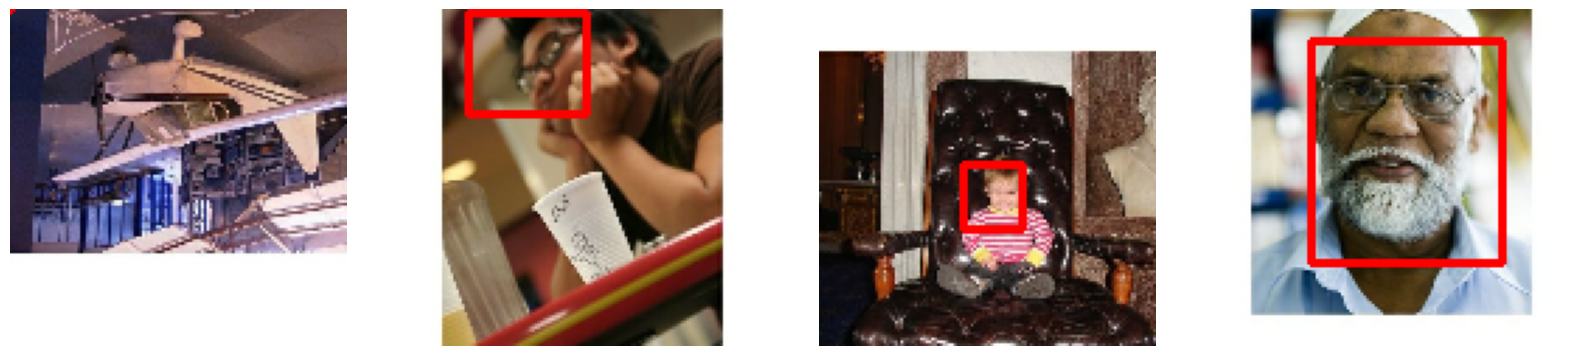

In [184]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx in range(4): 
#     sample_image = test_sample[0][idx]
#     sample_coords = yhat[1][idx]
    
#     if yhat[0][idx] > 0.9:
#         cv2.rectangle(sample_image, 
#                       tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
#                       tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
#                             (255,0,0), 2)

#     ax[idx].imshow(sample_image)
    
# Assuming res is your result, containing images and corresponding coordinates
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    # Ensure that the coordinates are a 1D array
    coords = np.array(sample_coords).flatten()

    # Determine the number of points
    num_points = len(coords) // 2

    # Reshape coordinates to (num_points, 2) array
    coords = coords.reshape((num_points, 2))

    # Convert coordinates to integer values for drawing
    bbox_start = tuple((coords.min(axis=0) * [120, 120]).astype(int))
    bbox_end = tuple((coords.max(axis=0) * [120, 120]).astype(int))

    # Convert sample_image to cv2.UMat
    sample_image_umat = cv2.UMat(sample_image)

    # Draw bounding box on the image
    cv2.rectangle(sample_image_umat, bbox_start, bbox_end, (255, 0, 0), 2)

    # Convert the result back to NumPy array
    sample_image_with_bbox = sample_image_umat.get()

    # Display the image with the bounding box
    ax[idx].imshow(sample_image_with_bbox)
    ax[idx].axis('off')  # Turn off axis labels for better visualization

plt.show()

### 11.2 Save the Model

In [185]:
from tensorflow.keras.models import load_model

In [186]:
# We save our model
facetracker.save('facetracker.h5')

C:\Users\Ramita\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [187]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [ ]:
# Real time face tracking using OpenCV and TensorFlow
cap = cv2.VideoCapture(1)  # Open a video capture object for the default camera (camera index 1)

while cap.isOpened():  # Continue looping as long as the video capture is open
    _, frame = cap.read()  # Read a frame from the video capture
    frame = frame[50:500, 50:500, :]  # Crop the frame to a region of interest
    
    # Convert the frame from BGR to RGB
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Resize the frame to the desired input size for the face tracker model (120x120)
    resized = tf.image.resize(rgb, (120, 120))
    
    # Make predictions using the face tracker model
    yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
    sample_coords = yhat[1][0]  # Extract the predicted coordinates
    
    if yhat[0] > 0.5:  # Check if the model predicts the presence of a face (confidence threshold)
        # Draw a rectangle around the detected face
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                      (255, 0, 0), 2)
        
        # Draw a filled rectangle as a label background
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [80, 0])),
                      (255, 0, 0), -1)
        
        # Render the text 'face' on the frame
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Display the frame with the tracking results
    cv2.imshow('FaceTrack', frame)
    
    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()
